<h1 style="background-color:#ADD8E6;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 1px 5px;">1. Réseau de neurones, explication de l'algorithme  
</h1>

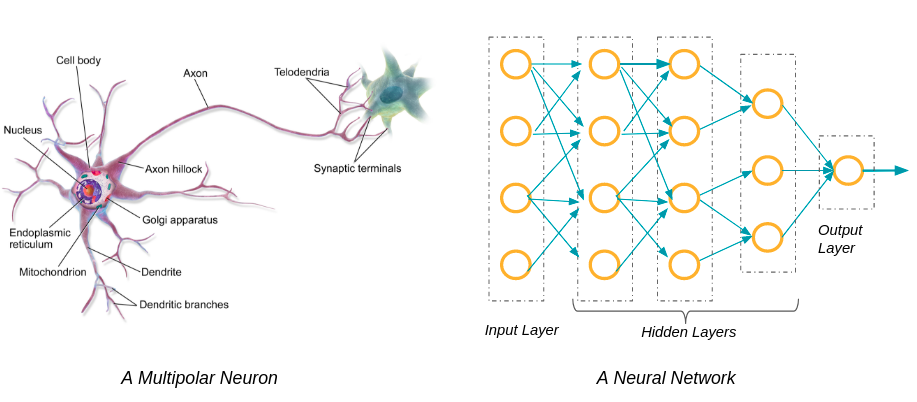

In [157]:
display.Image("images/nn_intro.png")

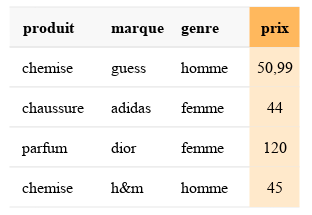

In [158]:
display.Image("images/var_cat.png")

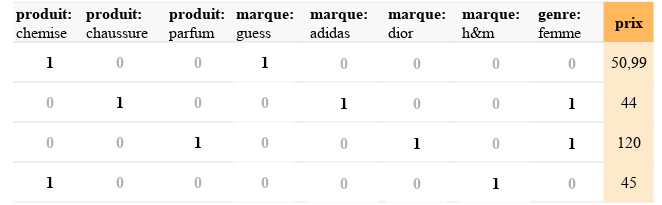

In [159]:
display.Image("images/var_num.png")

<h2 style="color:#E74C3C  ;font-family:newtimeroman">Déclarer des paramètres:</h2>

<h2 style="color:#E74C3C  ;font-family:newtimeroman">Etape 2: La Forward pass: </h2>

<h2 style="color:#E74C3C  ;font-family:newtimeroman">Etape 3: Backend propagation  (rétropropagation du gradient) </h2>

<h2 style="color:#E74C3C  ;font-family:newtimeroman">Etape 4: Gradient Descent:</h2>

In [ ]:
Remarque:
    Il faut bien choisir la valeur du alpha: ni trés petite, ni trop grande    

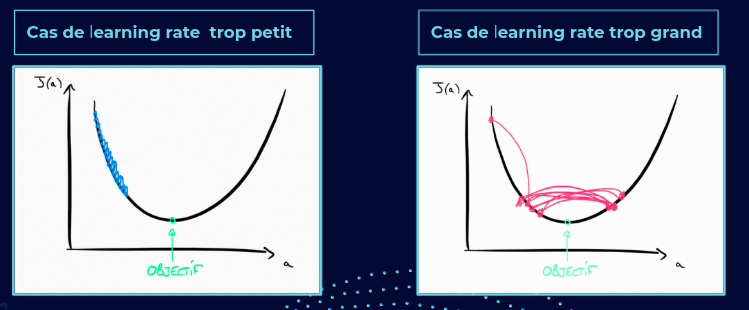

In [163]:
display.Image("images/alpha.png")

<h2 style="color:#E74C3C  ;font-family:newtimeroman">Etape 5: Apprentissage:</h2>

<h1 style="background-color:#ADD8E6;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 1px 5px;">2. Recréez un réseau de neurones avec deux couches</h1>

<h1 style="color:#A569BD  ;font-family:newtimeroman">1.1) Declaration des fonctions à utiliser</h1>

In [153]:
"""------------------------------------------Bibliothèques:-----------------------------------------------"""
import numpy as np
from random import gauss, seed
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

"""------------------------------------------Les fonctions-----------------------------------------------"""
#Déclarer la fonction d'activation tangente hyperbolique
def tanh(z):
    return np.tanh(z)

#Déclarer la fonction dérivée de tanh: (1-tanh(z)²)
def derive_tanh(z):
    return 1 - (np.tanh(z) ** 2)

# Declarer la fonction de loss: cas de classification
def loss(y,p):
    return -y * log(p) - (1-y) * log(1-p)
#Déclarer la dérivée de la loss (utilisée lors de la backprop)
def loss_prime(y,p):
    return (p-y) / p * (1 - p)

# La frontière de décision:
def frontière_de_décision(function):
  # créer une grille
  axe1 = np.linspace(-5, 2.5)
  axe2 = axe1
  grille_a1 = []
  grille_a2 = []
  predictions = []
  for a1 in axe1:
    for a2 in axe2:
      grille_a1.append(a1)
      grille_a2.append(a2)
      # au passage on fait une prédiction sur le point de coordonnées (a1, a2)
      predictions.append(function(a1, a2))
  graphique = sns.scatterplot(grille_a1, grille_a2,
                  hue=predictions)
  ax = graphique.axes
  ax.axhline(y=0, c='k')
  ax.axvline(x=0, c='k')
  plt.show()

<h1 style="color:#A569BD  ;font-family:newtimeroman">1.2) Preparation du dataset en fournissant des données de la fonction xor:</h1>

/home/djoudja/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

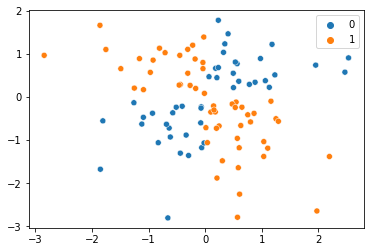

In [155]:
taille_dataset = 100
#Génerer les donées de l'entrée 1 et 2 aléatoirement, resultat: tableau de taille 100
Entree1 = np.random.randn(taille_dataset) 
Entree2 = np.random.randn(taille_dataset) 

#Générer les données du label y avec le résultat de la fonction de simulation: x*y < 0 : si oui: renvoyer 1, sinon 0
Y_label = (Entree1 * Entree2 <0).astype(int)
dataset = Entree1, Entree2, Y_label

#Visualiser les données avec scatterplot de la bibliothèque seaborn
sns.scatterplot(Entree1,Entree2,hue=Y_label)

<h1 style="color:#A569BD  ;font-family:newtimeroman">1.3) Réseau de neurone à programmer</h1>

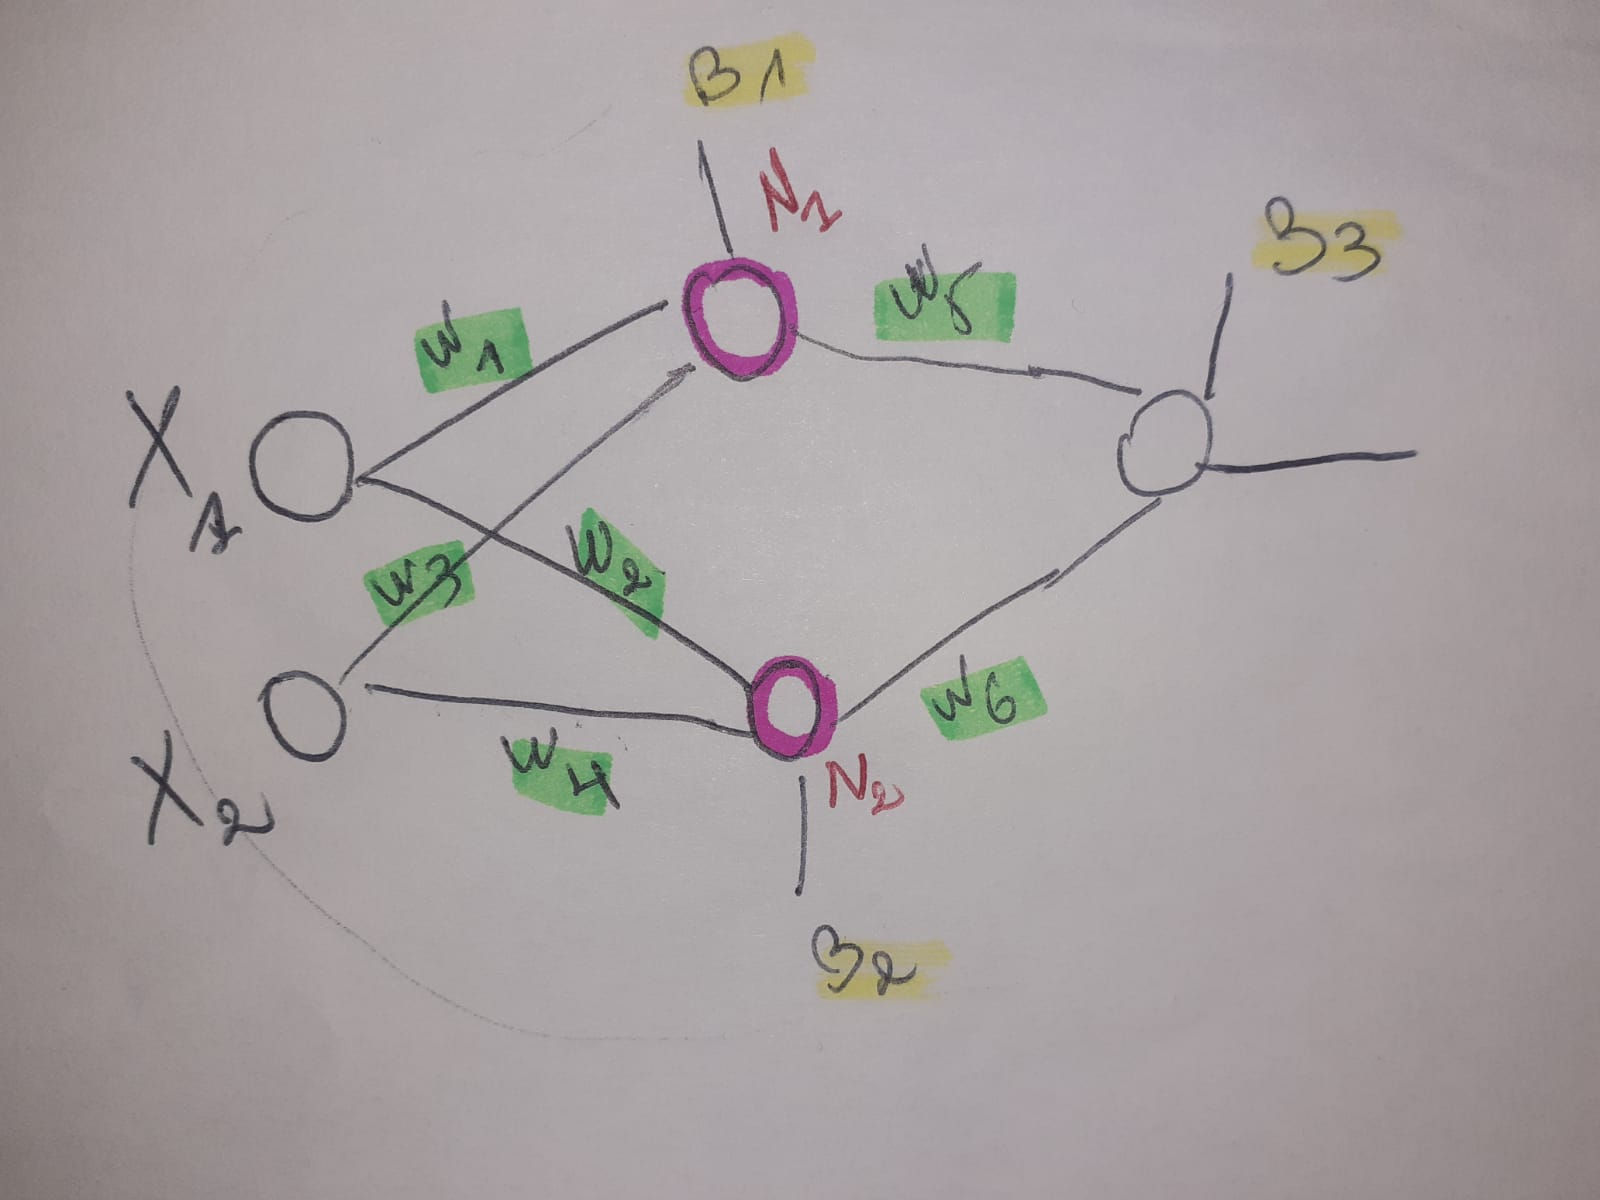

In [145]:
display.Image("images/exempleNN.jpeg")

<h2 style="color:#48C9B0  ;font-family:newtimeroman">1.3.1) Partie déclaraton de fonction de creation du reseau </h2>

In [ ]:
def créer_neural_network(w1, w2, w3, w4, w5, w6, b1,b2,b3, seuil=None):
    def neural_network(x1, x2, seuil=seuil):       
               
    """Couche1:
        Calculer la combinaison linéaire entre les paramètres et les entrées du neurone (Données du dataset)
        pour l'entrée X1, ensuite pour l'entrée X2
        Ensuite appliquer la fonction d'activation tangente hyperbolique à cette combinaison.        
        
    """
    
        X1 =[x1,x2]
        z1 = w1 * X1[0] + w2 *X1[1]+b1       
        tanh1 = tanh(z1)
        
        z2 = w3 * X1[0] + w4 *X1[1]+b2       
        tanh2 = tanh(z2)
        
    
     """Couche1:
        Calculer la combinaison linéaire entre les poids des segments entrants vers noeud de sortie 
        Les sorties de la couche 1 sont devenues entrées de la couche2 ! 
        
    """
        X2 = [tanh1,tanh2]
        z3 = w5 * X2[0] + w6 *X2[1]+b3
        tanh3 = tanh(z3)
        
        if seuil:
            return int(tanh3 > seuil)
        return p
    return neural_network

<h2 style="color:#48C9B0  ;font-family:newtimeroman">1.3.2) Partie apprentissage</h2>

/home/djoudja/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


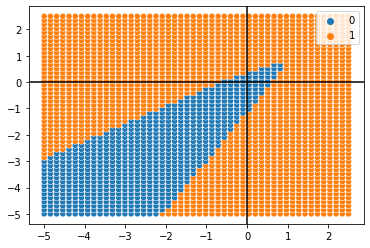

In [152]:
seed(0)

#Déclarer les poids W:
#Bonne pratique: génèrer tous les poids w avec la loi gaussiène
w1 = gauss(0,1) 
w2 = gauss(0,1)
w3 = gauss(0,1)
w4 = gauss(0,1)
w5 = gauss(0,1)
w6 = gauss(0,1)

#Bonne pratique 2: mettre tous les biais à zéro
b1, b2, b3 = 0, 0, 0

#Phase d'apprentissage:
for epoch in range(100):
    # a chaque etape, mélanger les données du dataset afin d'obtenir des résultats plus performants rapidement. 
    X1, X2, Y = shuffle(Entree1, Entree2, Y_label)
    
    for x1, x2, y in zip(Entree1,Entree2,Y_label):
        #Forward pass:
        # 1) Calculer la combinaison linéaire des entrées par leurs poids: 

        #Première couche
        X1=[x1,x2]
        combi1 = X1[0]*w1 + X1[1] * w2 + b1
        tanh1  = tanh(combi1)

        X2=[x1,x2]
        combi2 = X2[0]*w3 + X2[1] * w4 + b2
        tanh2  = tanh(combi2)


        #Deuxième couche:
        X3=[tanh1,tanh2]
        combi3 = X3[0]*w5 + X3[1] * w6 + b3
        tanh3  = tanh(combi3)

        # Backprop: Calculer les dérivées de la fonction loss par rapport à chaque paramètre  
        # backprop couche n°2
        sortie3 = tanh3
         #.....       
        d_sortie3 = sortie3 - y
        d_w6 = X3[1] * d_sortie3
        d_w5 = X3[0] * d_sortie3
        d_b3 = d_sortie3

        # backprop couche n°1

        #Pour le noeud N2:
        d_sortie2 = w6 * d_sortie3
        d_tanh2 =  derive_tanh(tanh2)

        d_w4 = d_tanh2 * d_sortie2 * w4
        d_w3 = d_tanh2 * d_sortie2 * w3
        d_b2 = d_tanh2 * d_sortie2

        # Pour le noeud N1:
        d_sortie1 = w5 * d_sortie3
        d_tanh1 = derive_tanh(tanh1)

        d_w2 = d_tanh1 * d_sortie1 * w2
        d_w1 = d_tanh1 * d_sortie1 * w1
        d_b1   = d_tanh1 * d_sortie1



        # gradient descent: 
        #Declarer un learning rate pas très grand ni trop petit
        alpha = 0.01

        # Mettre à jour les paramètres en enlevant la valeur du produit de la dérivée de la loss par rapport à ce paramètre et le learning_rate 
        w1 = w1 - alpha * d_w1
        w2 = w2 - alpha * d_w2    
        w3 = w3 - alpha * d_w3    
        w4 = w4 - alpha * d_w4    
        w5 = w5 - alpha * d_w5    
        w6 = w6 - alpha * d_w6    
        b1 = b1 - alpha * d_b1    
        b2 = b2 - alpha * d_b2    
        b3 = b3 - alpha * d_b3    
        
neural_network=créer_neural_network(w1, w2, w3, w4, w5, w6, b1, b2, b3, seuil=0.5)
frontière_de_décision(neural_network)

<h1 style="background-color:#ADD8E6;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 1px 5px;">2. Recréez un réseau de neurones avec 3 couches</h1>

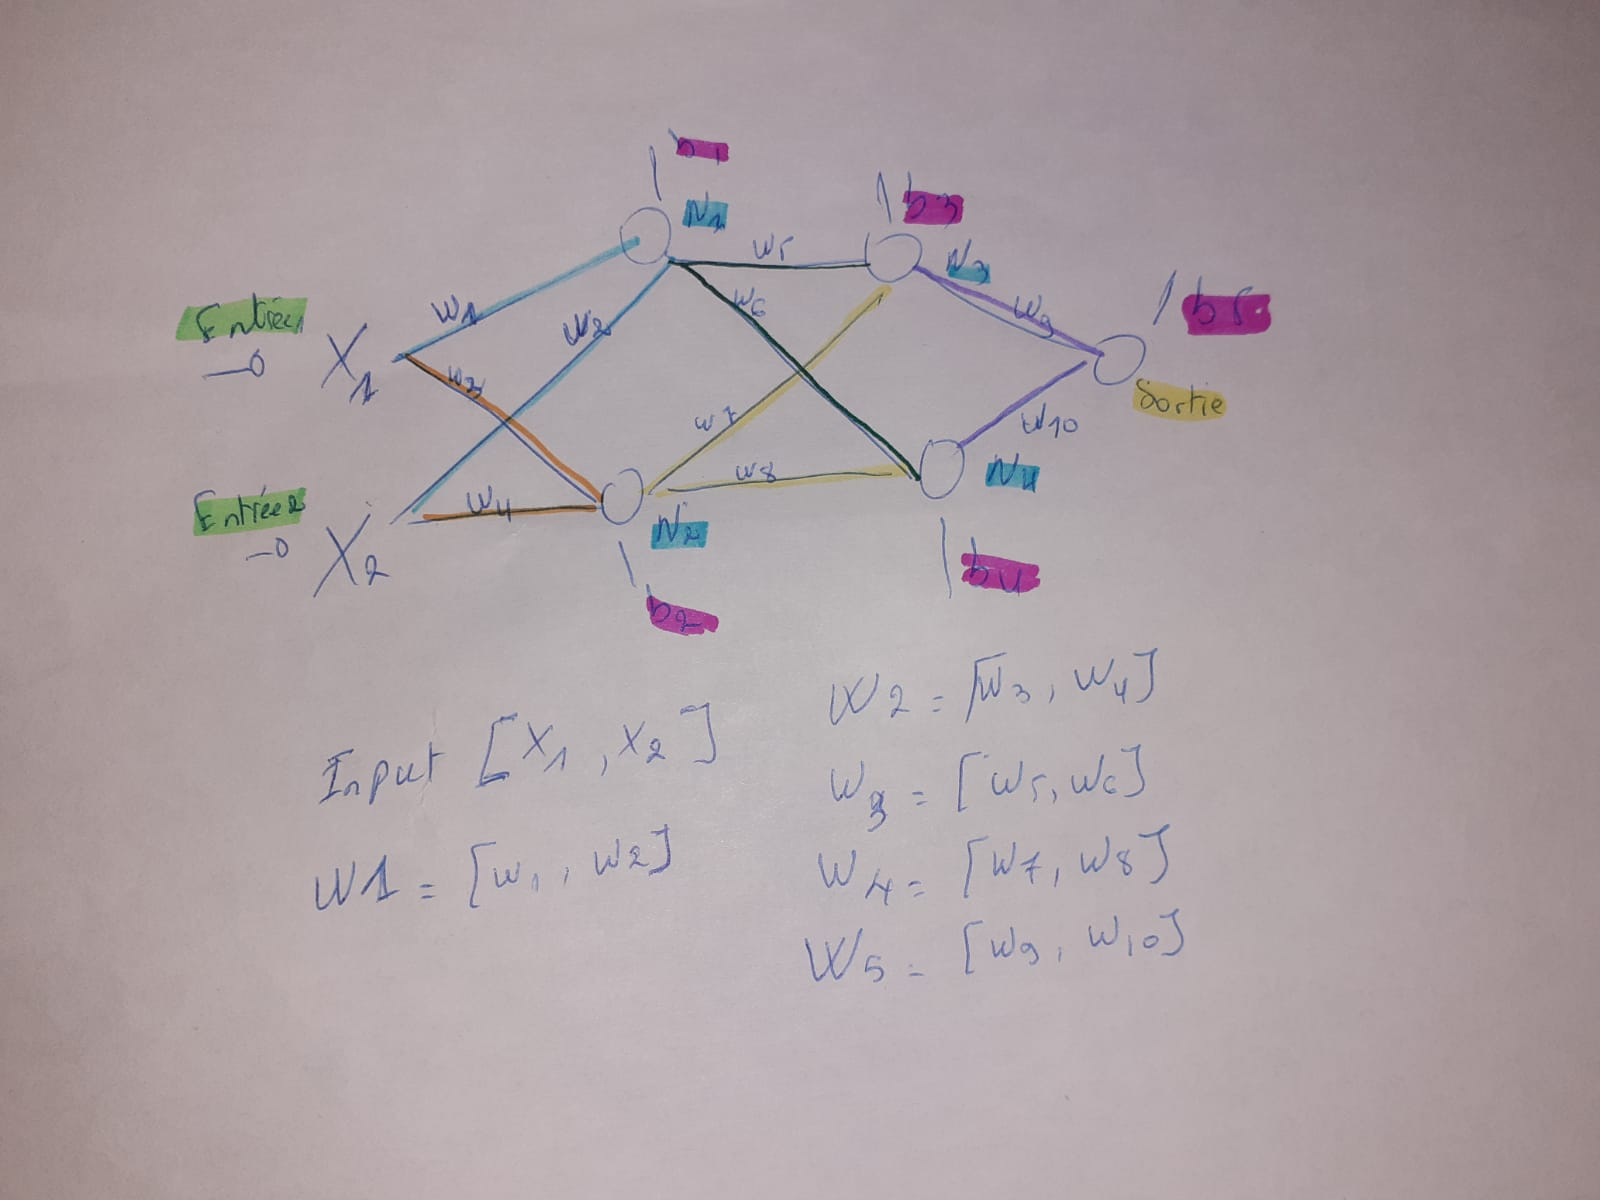

In [146]:
display.Image("images/nn3couche.jpeg")

<h2 style="color:#48C9B0  ;font-family:newtimeroman">2.1) Partie déclaraton de fonction de creation du reseau à 3 couches </h2>

In [126]:
def créer_neural_network_3layer(W1, W2, W3, W4, W5, b1,b2,b3,b4,b5, seuil=None):
    def neural_network(x1, x2, seuil=seuil):
       
    #Première couche
        X1=[x1,x2]
        combi1 = X1[0]*W1[0] + X1[1] * W1[1] + b1
        tanh1  = tanh(combi1)

        X2=[x1,x2]
        combi2 = X2[0]* W2[0] + X2[1] * W2[1] + b2
        tanh2  = tanh(combi2)


        #Deuxième couche:
        N1=[tanh1,tanh2]
        combi3 = N1[0] * W3[0] + N1[1] * W3[1] + b3
        tanh3  = tanh(combi3)
        
        N2=[tanh1,tanh2]
        combi4 = N2[0] * W4[0] + N2[1] * W4[1] + b4
        tanh4  = tanh(combi4)
        
         #Troixième couche:
        X3 = [tanh3, tanh4] 
        combi5 = X3[0] * W5[0] + X3[1] *W5[1] + b5
        tanh5  = tanh(combi5)   
               
        
        if seuil:
            return int(tanh5 > seuil)
        return p
    return neural_network

<h2 style="color:#48C9B0  ;font-family:newtimeroman">1.3.1) Partie apprentissage </h2>

In [169]:
seed(0)

#Déclarer les poids W:
#Bonne pratique: génèrer tous les poids w avec la loi gaussiène
W1 = [gauss(0,1), gauss(0,1)] 
W2 = [gauss(0,1), gauss(0,1)] 
W3 = [gauss(0,1), gauss(0,1)] 
W4 = [gauss(0,1), gauss(0,1)] 
W5 = [gauss(0,1), gauss(0,1)] 

#Bonne pratique 2: mettre tous les biais à zéro
b1, b2, b3, b4, b5 = 0, 0, 0, 0, 0
print("Poids avant mise a jour: \n",W1,W2,W3,W4,W5)
#Phase d'apprentissage:
for epoch in range(500):
    X1, X2, Y = shuffle(Entree1, Entree2, Y_label)
    
    for x1, x2, y in zip(X1, X2, Y):
        #Forward pass:
        # 1) Calculer la combinaison linéaire des entrées par leurs poids: 

        #Première couche
        X1=[x1,x2]
        combi1 = X1[0]*W1[0] + X1[1] * W1[1] + b1
        tanh1  = tanh(combi1)

        X2=[x1,x2]
        combi2 = X2[0]* W2[0] + X2[1] * W2[1] + b2
        tanh2  = tanh(combi2)


        #Deuxième couche:
        N1=[tanh1,tanh2]
        combi3 = N1[0] * W3[0] + N1[1] * W3[1] + b3
        tanh3  = tanh(combi3)
        
        N2=[tanh1,tanh2]
        combi4 = N2[0] * W4[0] + N2[1] * W4[1] + b4
        tanh4  = tanh(combi4)
        
         #Troixième couche:
        X3 = [tanh3, tanh4] 
        combi5 = X3[0] * W5[0] + X3[1] *W5[1] + b5
        tanh5  = tanh(combi5)
        
        # Backprop: Calculer les dérivées de la fonction loss par rapport à chaque paramètre  
        # backprop couche n°3
        
        sortie5 = tanh5
        # A vérifier 
        d_sortie5 = sortie5 - y
        d_W5 = [X3[0] * d_sortie5, X3[1] * d_sortie5]        
        d_b5 = d_sortie5

        # backprop couche n°2

        #Pour le noeud N4:
        d_sortie4 = W5[1] * d_sortie5
        d_tanh4 =  derive_tanh(tanh4)

        d_W4 = [d_tanh4 * d_sortie4 * W4[0], d_tanh4 * d_sortie4 * W4[1]]       
        d_b4 = d_tanh4 * d_sortie4

        # Pour le noeud N3:
        d_sortie3 = W5[0] * d_sortie5
        d_tanh3 =  derive_tanh(tanh3)
        d_W3 = [d_tanh3 * d_sortie3 * W3[0], d_tanh3 * d_sortie3 * W3[1]]       
        d_b3 = d_tanh3 * d_sortie3
        
        #Couche N°1:
        
        #Pour le noeud N2:
        #N2 peut se produire de deux manières: soit la sortie de N3 avec le w3[0]
        #Soit avec le N4 
        d_sortie2 = W4[1] * d_sortie4
        d_tanh2 =  derive_tanh(tanh2)
        d_W2 = [d_tanh2 * d_sortie2 * W2[0], d_tanh2 * d_sortie2 * W2[1]]       
        d_b2 = d_tanh2 * d_sortie2

        # Pour le noeud N1:
        d_sortie1 = W3[1] * d_sortie3
        d_tanh1 =  derive_tanh(tanh1)
        d_W1 = [d_tanh1 * d_sortie1 * W1[0], d_tanh1 * d_sortie1 * W1[1]]       
        d_b1 = d_tanh1 * d_sortie1
            
        # gradient descent: 
        #Declarer un learning rate pas très grand ni trop petit
        alpha = 0.01

        # Mettre à jour les paramètres en enlevant la valeur du produit de la dérivée de la loss par rapport à ce paramètre et le learning_rate 
        W1 = [W1[0] - alpha * d_W1[0],
              W1[1] -  alpha * d_W1[1]]
        
        W2 =  [W2[0] - alpha * d_W2[0],
              W2[1] -  alpha * d_W2[1]]    
        
        W3 =  [W3[0] - alpha * d_W3[0],
              W3[1] -  alpha * d_W3[1]]    
        
        W4 =  [W4[0] - alpha * d_W4[0],
              W4[1] -  alpha * d_W4[1]]    
        
        W5 =  [W5[0] - alpha * d_W5[0],
              W5[1] -  alpha * d_W5[1]]    
        
        b1 = b1 - alpha * d_b1    
        b2 = b2 - alpha * d_b2    
        b3 = b3 - alpha * d_b3  
        b4 = b4 - alpha * d_b4  
        b5 = b5 - alpha * d_b5  

print("\nPoids Apres mise a jour: \n",W1,W2,W3,W4,W5)


Poids avant mise a jour: 
 [0.9417154046806644, -1.3965781047011498] [-0.6797144480784211, 0.3705035674606598] [-1.016348894188071, -0.07212002278507135] [0.17919648727485687, -0.8310992152709882] [-1.3090373644593587, 0.1938877412491041]

Poids Apres mise a jour: 
 [0.5224537026225362, -0.7748066965625461] [-0.31899787434896354, 0.17388162160269818] [-1.7212525559001406, -0.12213992090732786] [0.09316695488352207, -0.4321010097375251] [-1.0405491757804903, -1.9394819360242088]


/home/djoudja/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


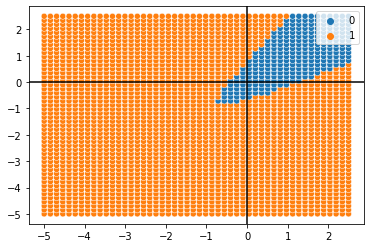

In [170]:
nn_3l = créer_neural_network_3layer(W1 ,W2 ,W3 ,W4 ,W5 ,b1 ,b2 ,b3 ,b4 ,b5 ,seuil = 0.5)
frontière_de_décision( nn_3l )
